# Unit 5 - Financial Planning

In [4]:
# Initial imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation

%matplotlib inline

## Trouble Shooting

In [5]:
! ls -alsF

total 184
  0 drwxr-xr-x  8 mattbuchanan  staff    256 18 Oct 01:38 ./
  0 drwxr-xr-x  6 mattbuchanan  staff    192 21 Jun 21:54 ../
 16 -rw-r--r--@ 1 mattbuchanan  staff   6148 16 Jul 20:31 .DS_Store
  0 drwxr-xr-x  6 mattbuchanan  staff    192 19 Jul 22:48 .ipynb_checkpoints/
 16 -rwxr-xr-x  1 mattbuchanan  staff   7250 16 Jul 21:45 MCForecastTools.py*
  8 -rw-r--r--  1 mattbuchanan  staff   1594  6 Sep 21:15 Untitled.ipynb
  0 drwxr-xr-x  3 mattbuchanan  staff     96 18 Oct 01:38 __pycache__/
144 -rw-r--r--@ 1 mattbuchanan  staff  71863 18 Oct 01:37 financial-planner.ipynb


In [6]:
! pwd

/Users/mattbuchanan/Desktop/API Homework Week 5/monu-mel-virt-fin-pt-05-2021-u-c/Homework/Week 5/Instructions/Starter_Code


In [7]:
# Load .env enviroment variables
load_dotenv()

True

In [8]:
# Find DotEnv
from dotenv import find_dotenv
print(find_dotenv())

/Users/mattbuchanan/Desktop/.env


## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the `requests` Library

In [9]:
# Set current amount of crypto assets
qnt_btc = 0.5
qnt_eth = 3

In [10]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=CAD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=CAD"

In [11]:
# Fetch current BTC price
btc_response = requests.get(btc_url).json()
btc_price = btc_response["data"]["1"]["quotes"]["CAD"]["price"]
# Fetch current ETH price
eth_response = requests.get(eth_url).json()
eth_price = eth_response["data"]["1027"]["quotes"]["CAD"]["price"]
# Compute current value of my crypto
my_btc_value = qnt_btc * btc_price
my_eth_value = qnt_eth * eth_price
wallet_balance = my_eth_value + my_btc_value
# Print current crypto wallet balance
print(f"The current value of your {qnt_btc} BTC is ${my_btc_value:0.2f}")
print(f"The current value of your {qnt_eth} ETH is ${my_eth_value:0.2f}")


The current value of your 0.5 BTC is $37736.24
The current value of your 3 ETH is $14336.35


### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [12]:
# Set current amount of shares
my_agg = 200
my_spy = 50

In [13]:
# Set Alpaca API key and secret
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")
# Create the Alpaca API object
alpaca = tradeapi.REST(
    alpaca_api_key, 
    alpaca_secret_key)

In [14]:
# Format current date as ISO format
start_date = pd.Timestamp("2011-06-04", tz = "America/new_york").isoformat()
end_date = pd.Timestamp("2021-06-04", tz = "America/new_york").isoformat()
# Set the tickers
tickers = ["AGG", "SPY"]

# Set timeframe to '1D' for Alpaca API
timeframe = "1D"

# Get current closing prices for SPY and AGG
# (use a limit=1000 parameter to call the most recent 1000 days of data)
tickers_df = alpaca.get_barset(tickers, timeframe, start=start_date, end=end_date, limit=1000).df

# Preview DataFrame
tickers_df


AGG                                       \
                             open    high      low    close     volume   
time                                                                     
2017-06-14 00:00:00-04:00  110.00  110.18  109.850  109.950  2304819.0   
2017-06-15 00:00:00-04:00  109.90  109.90  109.780  109.870  1938779.0   
2017-06-16 00:00:00-04:00  109.86  109.97  109.850  109.945  1709677.0   
2017-06-19 00:00:00-04:00  109.87  109.90  109.740  109.790  1375531.0   
2017-06-20 00:00:00-04:00  109.85  110.03  109.800  109.975  2010628.0   
...                           ...     ...      ...      ...        ...   
2021-05-28 00:00:00-04:00  114.55  114.68  114.500  114.510  6186451.0   
2021-06-01 00:00:00-04:00  114.40  114.40  114.164  114.340  5655159.0   
2021-06-02 00:00:00-04:00  114.45  114.51  114.300  114.485  5649317.0   
2021-06-03 00:00:00-04:00  114.31  114.46  114.210  114.210  3270096.0   
2021-06-04 00:00:00-04:00  114.39  114.67  114.220  114.665  4334878.0   

                              SPY                                        
                             open    high       low   close      volume  
time                                                                     
2017-06-14 00:00:00-04:00     NaN     NaN       NaN     NaN         NaN  
2017-06-15 00:00:00-04:00  242.68  243.91  242.3600  243.79  51523068.0  
2017-06-16 00:00:00-04:00  242.77  242.83  241.6337  242.63  48998243.0  
2017-06-19 00:00:00-04:00  243.59  244.73  243.4800  244.64  42503652.0  
2017-06-20 00:00:00-04:00  244.25  244.26  242.9900  243.04  39203167.0  
...                           ...     ...       ...     ...         ...  
2021-05-28 00:00:00-04:00  420.97  421.25  419.7900  420.02  49200328.0  
2021-06-01 00:00:00-04:00  422.57  422.72  419.2000  419.63  47607950.0  
2021-06-02 00:00:00-04:00  420.37  421.23  419.2900  420.38  41250387.0  
2021-06-03 00:00:00-04:00  417.87  419.99  416.2800  418.86  51582905.0  
2021-06-04 00:00:00-04:00  420.75  422.92  418.8422  422.57  45129316.0  

[1001 rows x 10 columns]

In [15]:
# Pick AGG and SPY close prices
agg_close_price = tickers_df["AGG"]["close"].iloc[-1]
spy_close_price = tickers_df["SPY"]["close"].iloc[-1]

# Print AGG and SPY close prices
print(f"Current AGG closing price: ${agg_close_price}")
print(f"Current SPY closing price: ${spy_close_price}")

Current AGG closing price: $114.665
Current SPY closing price: $422.57


In [16]:
# Compute the current value of shares
my_agg_value = my_agg * agg_close_price
my_spy_value = my_spy * spy_close_price


# Print current value of shares
print(f"The current value of your {my_spy} SPY shares is ${my_spy_value:0.2f}")
print(f"The current value of your {my_agg} AGG shares is ${my_agg_value:0.2f}")

The current value of your 50 SPY shares is $21128.50
The current value of your 200 AGG shares is $22933.00


### Savings Health Analysis

In [17]:
# Set monthly household income
household_income_monthly = 2000
# Consolidate financial assets data
savings_data = [
    my_btc_value + my_eth_value,
    my_spy_value + my_agg_value,
]
crypto_wallet = my_btc_value + my_btc_value
stocks = my_agg_value + my_spy_value
# Create savings DataFrame
df_savings = pd.DataFrame(savings_data, index=["crypto", "shares"], columns=["amount"])

# Display savings DataFrame
display(df_savings)

,amount
crypto,52072.588662
shares,44061.500000


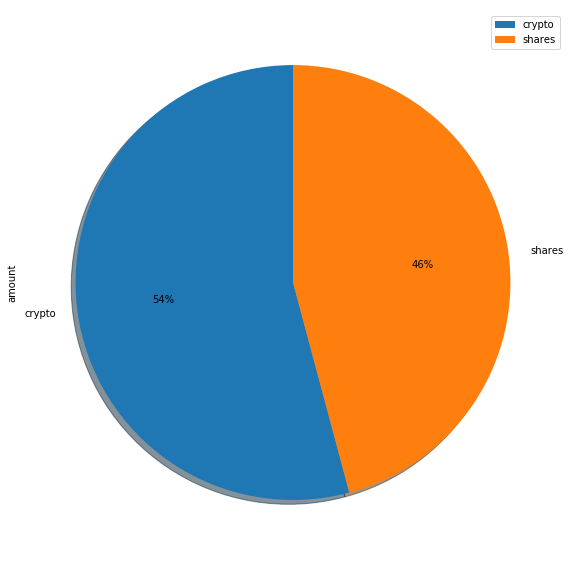

In [18]:
# Plot savings pie chart
df_savings.plot.pie(y="amount", figsize=(15,10), autopct='%0.f%%', shadow=True, startangle=90)

In [19]:
# Set ideal emergency fund
emergency_fund = household_income_monthly * 3

# Calculate total amount of savings
savings_value = crypto_wallet + stocks
# Validate saving health
# YOUR CODE HERE!

## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [20]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
start_date = pd.Timestamp('2016-05-01', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2021-05-01', tz='America/New_York').isoformat()

In [21]:
# Get 5 years' worth of historical data for SPY and AGG
# (use a limit=1000 parameter to call the most recent 1000 days of data)
df_ticker = alpaca.get_barset(
tickers,
timeframe,
start=start_date,
end=end_date,
limit=1000
).df

# Display sample data
df_ticker.head()

AGG                                         \
                             open     high       low    close     volume   
time                                                                       
2017-05-10 00:00:00-04:00  108.60  108.660  108.4400  108.520  1427511.0   
2017-05-11 00:00:00-04:00  108.35  108.540  108.3435  108.515  1773499.0   
2017-05-12 00:00:00-04:00  108.81  108.940  108.7800  108.920  1136553.0   
2017-05-15 00:00:00-04:00  108.85  108.940  108.8200  108.890  1620264.0   
2017-05-16 00:00:00-04:00  108.88  109.101  108.8800  109.000  1394153.0   

                              SPY                                       
                             open    high     low    close      volume  
time                                                                    
2017-05-10 00:00:00-04:00     NaN     NaN     NaN      NaN         NaN  
2017-05-11 00:00:00-04:00  239.35  239.57  238.13  239.410  45435690.0  
2017-05-12 00:00:00-04:00  239.09  239.21  238.67  239.030  35283567.0  
2017-05-15 00:00:00-04:00  239.47  240.44  239.45  240.245  42230620.0  
2017-05-16 00:00:00-04:00  240.62  240.67  239.63  240.100  37206183.0

In [30]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
MC_Stock_Sim30 = MCSimulation(
    portfolio_data = tickers_df,
    weights = [.5, .5],
    num_simulation = 500,
    num_trading_days = 252*30
)

In [31]:
# Printing the simulation input data
MC_Stock_Sim30.portfolio_data.head()

AGG                                      \
                             open    high     low    close     volume   
time                                                                    
2017-06-14 00:00:00-04:00  110.00  110.18  109.85  109.950  2304819.0   
2017-06-15 00:00:00-04:00  109.90  109.90  109.78  109.870  1938779.0   
2017-06-16 00:00:00-04:00  109.86  109.97  109.85  109.945  1709677.0   
2017-06-19 00:00:00-04:00  109.87  109.90  109.74  109.790  1375531.0   
2017-06-20 00:00:00-04:00  109.85  110.03  109.80  109.975  2010628.0   

                                           SPY                            \
                          daily_return    open    high       low   close   
time                                                                       
2017-06-14 00:00:00-04:00          NaN     NaN     NaN       NaN     NaN   
2017-06-15 00:00:00-04:00    -0.000728  242.68  243.91  242.3600  243.79   
2017-06-16 00:00:00-04:00     0.000683  242.77  242.83  241.6337  242.63   
2017-06-19 00:00:00-04:00    -0.001410  243.59  244.73  243.4800  244.64   
2017-06-20 00:00:00-04:00     0.001685  244.25  244.26  242.9900  243.04   

                                                    
                               volume daily_return  
time                                                
2017-06-14 00:00:00-04:00         NaN          NaN  
2017-06-15 00:00:00-04:00  51523068.0          NaN  
2017-06-16 00:00:00-04:00  48998243.0    -0.004758  
2017-06-19 00:00:00-04:00  42503652.0     0.008284  
2017-06-20 00:00:00-04:00  39203167.0    -0.006540

In [32]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
MC_Stock_Sim30.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.004181,0.990787,0.996721,1.000847,1.004964,1.000067,0.989097,1.013533,0.990783,1.003478,...,1.018974,1.005071,1.002178,0.998039,0.996352,1.016363,1.001645,1.006160,1.005457,1.000512
2,1.005175,0.993309,1.000633,1.011995,1.004410,0.991899,0.994118,1.003695,0.989987,1.010367,...,1.021014,1.012366,1.004638,0.997191,0.991572,1.004360,0.990692,1.015600,1.017382,1.014158
3,1.007506,0.991025,0.996919,1.015235,1.018326,0.977690,0.985845,1.001413,0.990086,1.016611,...,1.023221,1.013744,0.995798,0.994012,1.003248,1.014771,0.993159,1.019485,1.018083,1.000806
4,0.992823,1.002983,1.000160,1.006557,1.014908,0.975529,0.990291,1.007777,0.987313,1.019348,...,1.032395,1.008347,0.984849,0.994825,1.023503,1.022570,0.993059,1.032391,1.032685,0.997575
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,14.209627,8.559027,22.893774,10.472481,15.690733,12.355932,13.531279,4.092979,3.194214,17.369072,...,8.822958,7.781995,12.209283,5.587000,6.322393,4.792332,14.157433,12.831379,18.710286,13.252071
7557,14.121293,8.611883,22.972111,10.548013,15.727402,12.216964,13.702899,4.088810,3.193004,17.344003,...,8.909814,7.712540,12.218735,5.611867,6.317879,4.786565,14.145861,12.933317,18.833741,13.462297
7558,14.039439,8.651302,22.925305,10.627660,15.700464,12.213279,13.642847,4.125043,3.199777,17.454041,...,8.887659,7.701769,12.193070,5.616221,6.286513,4.786651,14.141506,12.916360,18.585541,13.533233
7559,14.022707,8.642424,23.062500,10.576052,15.727844,12.137098,13.778826,4.120606,3.203538,17.366432,...,8.934174,7.658626,12.161547,5.606755,6.273834,4.778588,14.058842,12.848463,18.898903,13.485893


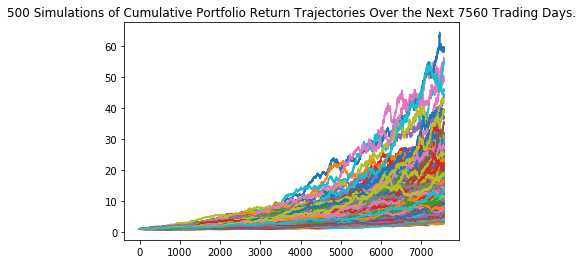

In [33]:
# Plot simulation outcomes
MC_Stock_Sim30.plot_simulation()

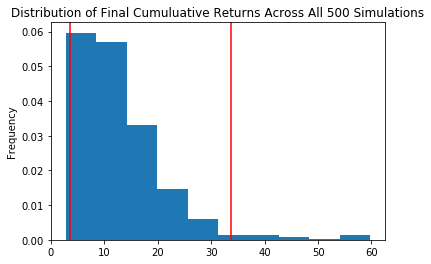

In [34]:
# Plot probability distribution and confidence intervals
MC_Stock_Sim30.plot_distribution()

### Retirement Analysis

In [38]:
# Fetch summary statistics from the Monte Carlo simulation results
stock_summary = MC_Stock_Sim30.summarize_cumulative_return()

# Print summary statistics
stock_summary

count           500.000000
mean             12.852637
std               8.363197
min               2.765582
25%               7.105619
50%              10.957663
75%              16.171234
max              59.750548
95% CI Lower      3.488616
95% CI Upper     33.720276
Name: 7560, dtype: float64

### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `$20,000` initial investment.

In [39]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
ci_lower = round(stock_summary[8] * initial_investment, 2)
ci_upper = round(stock_summary[9] * initial_investment, 2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $69772.33 and $674405.53


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [40]:
# Set initial investment
initial_investment = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
lower_ci = round(stock_summary[8] * initial_investment, 2)
upper_ci = round(stock_summary[9] * initial_investment, 2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 30 years will end within in the range of $69772.33 and $674405.53
